# *Stock Market prediction*
1) Target is to predict whether the price will increase or decrease the next day and not the exact price or value of the index

## 1) Importing libraries and packages

In [51]:
import yfinance as yf
import pandas as pd
import os
import matplotlib as plt

## 2) Fetching Data (using s&p 500 data)

In [52]:
Data = pd.read_csv(r"C:\Users\DELL\Desktop\MLPro\StocKMarketPrediction\sp500.csv")
Data['Date'] = pd.to_datetime(Data['Date'])
Data = Data.set_index(Data['Date'])
Data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1950-01-03,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...,...
2022-09-06,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


<Axes: xlabel='Date'>

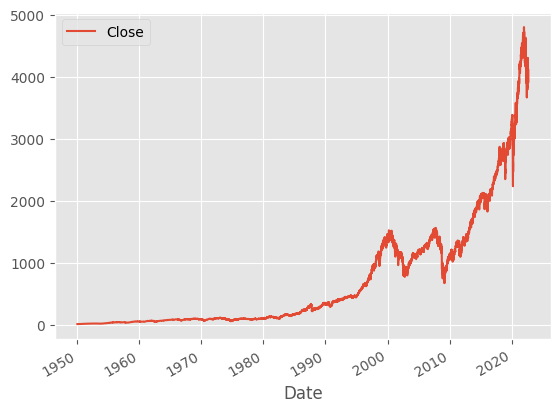

In [53]:
Data.plot.line(y="Close", use_index=True)

### Data cleaning(Deleting since these features are of a stock not an index)

In [54]:
del Data["Dividends"]
del Data["Stock Splits"]

In [55]:
Data["Tomorrow"] = Data["Close"].shift(-1)   #The closing price of the next day against the current day's data in a feature named Tomorrow
Data

,Date,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,,
1950-01-03,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...,...
2022-09-06,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117
2022-09-07,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932
2022-09-08,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107


In [56]:
Data['Objective'] = Data['Tomorrow'] > Data['Close'] #returns a boolean value
Data['Objective'] = Data['Objective'].astype(int) #coverting bool to int for the model
Data

,Date,Open,High,Low,Close,Volume,Tomorrow,Objective
Date,,,,,,,,
1950-01-03,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...,...
2022-09-06,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


In [57]:
Data = Data.loc["2000-01-01":].copy()

## 3) Training the model

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = Data.iloc[:-100]                 #Tain split
test = Data.iloc[-100:]                  #Test split

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Objective"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [61]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Objective"], preds)

0.4864864864864865

<Axes: xlabel='Date'>

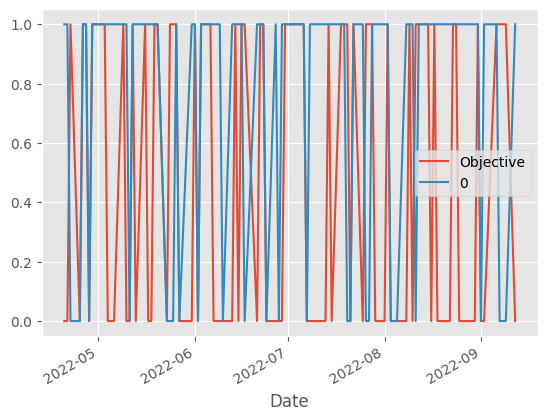

In [62]:
combined = pd.concat([test["Objective"], preds], axis=1)
combined.plot()

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], preds], axis=1)
    return combined

Backtesting the model

In [68]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [70]:
predictions = backtest(Data, model, predictors)
predictions["Predictions"].value_counts()

Predictions
1    1623
0    1587
Name: count, dtype: int64

In [71]:
precision_score(predictions["Objective"], predictions["Predictions"])

0.5286506469500925

In [72]:
predictions["Objective"].value_counts() / predictions.shape[0]

Objective
1    0.547352
0    0.452648
Name: count, dtype: float64

In [80]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    # Apply rolling mean only on numeric columns
    rolling_averages = Data.select_dtypes(include=['number']).rolling(horizon).mean()
    
    # Calculate the Close ratio
    ratio_column = f"Close_Ratio_{horizon}"
    Data[ratio_column] = Data["Close"] / rolling_averages["Close"]
    
    # Calculate the trend based on the "Objective" column, excluding non-numeric data
    trend_column = f"Trend_{horizon}"
    Data[trend_column] = Data["Objective"].shift(1).rolling(horizon).sum()
    
    # Add the generated columns to the list of new predictors
    new_predictors += [ratio_column, trend_column]

C:\Users\DELL\AppData\Local\Temp\ipykernel_14708\3547401609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[ratio_column] = Data["Close"] / rolling_averages["Close"]
C:\Users\DELL\AppData\Local\Temp\ipykernel_14708\3547401609.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[trend_column] = Data["Objective"].shift(1).rolling(horizon).sum()
C:\Users\DELL\AppData\Local\Temp\ipykernel_14708\3547401609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [81]:
Data = Data.dropna(subset=Data.columns[Data.columns != "Tomorrow"])

In [82]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [83]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Objective"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Objective"], preds], axis=1)
    return combined

In [84]:
predictions = backtest(Data, model, new_predictors)

In [86]:
predictions["Predictions"].value_counts()
precision_score(predictions["Objective"], predictions["Predictions"])
predictions["Objective"].value_counts() / predictions.shape[0]

Objective
1    0.547107
0    0.452893
Name: count, dtype: float64

In [ ]:
predictions